# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:
- Implement interaction terms in Python using the `sklearn` and `statsmodels` packages 
- Interpret interaction variables in the context of a real-world problem 

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below: 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [2]:
regression = LinearRegression()

Create a baseline model which includes all the variables we selected from the Ames housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [41]:
ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_cont, ames_ohe], axis=1)

X = preprocessed.drop('SalePrice', axis=1)
y = preprocessed['SalePrice']


In [42]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.7773817128042101

## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a `for` loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

Since there are so many different neighbourhoods we will exclude

In [43]:
from itertools import combinations
feat_combinations = combinations(X.columns, 2)
interactions = []
X_interact = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    X_interact['interaction'] = X_interact[a] * X_interact[b]
    score = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score, 3)))
    if i%50==0:
        print(i)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050


In [56]:
# code to find top interactions by R^2 value here
sorted(interactions, key=lambda interact: interact[2])

[('LotArea', 'SaleType_ConLI', 0.777),
 ('LotArea', 'Neighborhood_Sawyer', 0.777),
 ('1stFlrSF', 'MSZoning_RL', 0.777),
 ('GrLivArea', 'SaleType_ConLw', 0.777),
 ('GrLivArea', 'Neighborhood_Timber', 0.777),
 ('BldgType_2fmCon', 'Neighborhood_BrkSide', 0.777),
 ('BldgType_2fmCon', 'Neighborhood_Edwards', 0.777),
 ('BldgType_Duplex', 'KitchenQual_Gd', 0.777),
 ('BldgType_Duplex', 'Neighborhood_NAmes', 0.777),
 ('BldgType_Duplex', 'Neighborhood_NWAmes', 0.777),
 ('BldgType_Twnhs', 'Street_Pave', 0.777),
 ('BldgType_Twnhs', 'Neighborhood_Blueste', 0.777),
 ('BldgType_Twnhs', 'Neighborhood_BrDale', 0.777),
 ('BldgType_Twnhs', 'Neighborhood_Mitchel', 0.777),
 ('BldgType_Twnhs', 'Neighborhood_NPkVill', 0.777),
 ('BldgType_TwnhsE', 'MSZoning_FV', 0.777),
 ('BldgType_TwnhsE', 'Street_Pave', 0.777),
 ('BldgType_TwnhsE', 'Neighborhood_Blueste', 0.777),
 ('BldgType_TwnhsE', 'Neighborhood_BrDale', 0.777),
 ('BldgType_TwnhsE', 'Neighborhood_Mitchel', 0.777),
 ('BldgType_TwnhsE', 'Neighborhood_NPkVil

It looks like the top interactions involve the Neighborhood_Edwards feature so lets add the interaction between LotArea and Edwards to our model.

We can interpret this feature as the relationship between LotArea and SalePrice when the house is in Edwards or not.

## Visualize the Interaction

Separate all houses that are located in Edwards and those that are not. Run a linear regression on each population against `SalePrice`. Visualize the regression line and data points with price on the y axis and LotArea on the x axis.

[0.11975818]
[0.31970254]


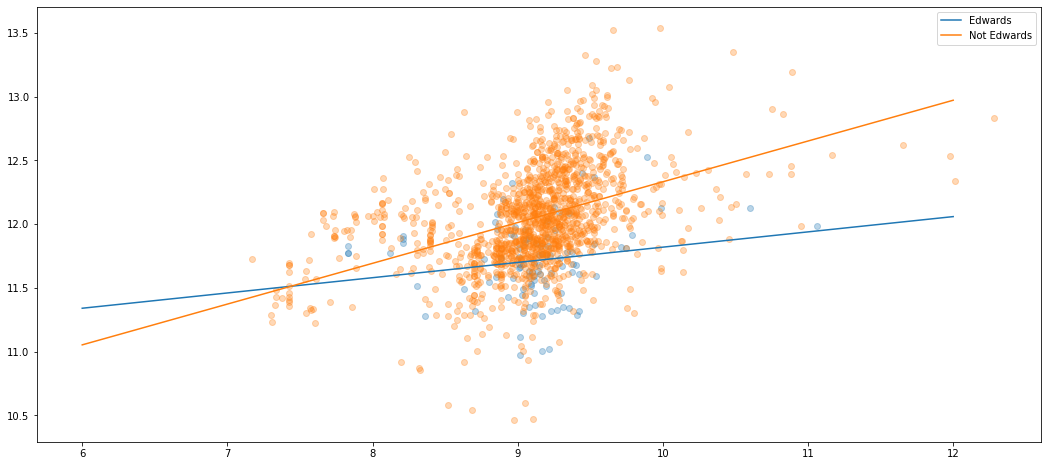

In [84]:
# Visualization code here
fig, ax = plt.subplots(figsize=(18,8))
edwards = preprocessed.loc[preprocessed['Neighborhood_Edwards'] == 1, ['LotArea', 'SalePrice']]
linreg1 = LinearRegression()
linreg1.fit(np.log(edwards[['LotArea']]), np.log(edwards['SalePrice']))
pred1 = linreg1.predict(np.log(edwards[['LotArea']]))
ax.scatter(np.log(edwards[['LotArea']]), np.log(edwards['SalePrice']), alpha=0.3)
print(linreg1.coef_)

not_edwards = preprocessed.loc[preprocessed['Neighborhood_Edwards'] == 0, ['LotArea', 'SalePrice']]
linreg2 = LinearRegression()
linreg2.fit(np.log(not_edwards[['LotArea']]), np.log(not_edwards['SalePrice']))
pred2 = linreg2.predict(np.log(not_edwards[['LotArea']]))
ax.scatter(np.log(not_edwards[['LotArea']]), np.log(not_edwards['SalePrice']), alpha=0.3)
print(linreg2.coef_)

plt.plot(np.linspace(6, 12), linreg1.predict(np.linspace(6, 12).reshape(-1, 1)), label='Edwards')
plt.plot(np.linspace(6, 12), linreg2.predict(np.linspace(6, 12).reshape(-1, 1)), label='Not Edwards')
plt.legend()

## Build a final model with interactions

Use 10-fold cross-validation to build a model using the above interaction. 

In [85]:
# code here
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

X_interact_2 = X.copy()
X_interact_2['Edwards*LotArea'] = X_interact_2['Neighborhood_Edwards'] * X_interact_2['LotArea']

X_final = np.mean(cross_val_score(regression, X_interact_2, y, scoring='r2', cv=crossvalidation))
X_final

0.8093314939295162

Our $R^2$ has increased considerably! Let's have a look in `statsmodels` to see if this interactions are significant.

In [86]:
# code here
import statsmodels.api as sm
X_interact_2 = sm.add_constant(X_interact_2)
model = sm.OLS(y,X_interact_2)
results = model.fit()

results.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     148.6
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:42:02   Log-Likelihood:                -17229.
No. Observations:                1460   AIC:                         3.456e+04
Df Residuals:                    1411   BIC:                         3.482e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.786e+04   2.21e+04      3.981      0.000    4.46e+04    1.31e+05
LotArea                  0.6108      0.103      5.916      0.000       0.408       0.813
1stFlrSF                35.0664      3.288     10.664      0.000      28.616      41.517
GrLivArea               58.1426      2.405     24.171      0.000      53.424      62.861
BldgType_2fmCon       -1.68e+04   6356.288     -2.644      0.008   -2.93e+04   -4335.365
BldgType_Duplex      -3.286e+04   4942.627     -6.649      0.000   -4.26e+04   -2.32e+04
BldgType_Twnhs       -3.628e+04   6923.682     -5.240      0.000   -4.99e+04   -2.27e+04
BldgType_TwnhsE      -2.334e+04   4546.417     -5.134      0.000   -3.23e+04   -1.44e+04
KitchenQual_Fa       -8.074e+04   7132.327    -11.320      0.000   -9.47e+04   -6.67e+04
KitchenQual_Gd        -5.41e+04   4088.126    -13.233      0.000   -6.21e+04   -4.61e+04
KitchenQual_TA       -6.998e+04   4519.771    -15.482      0.000   -7.88e+04   -6.11e+04
SaleType_CWD          2.125e+04   1.73e+04      1.227      0.220   -1.27e+04    5.52e+04
SaleType_Con          6.292e+04   2.45e+04      2.572      0.010    1.49e+04    1.11e+05
SaleType_ConLD        1.643e+04   1.25e+04      1.314      0.189   -8097.652    4.09e+04
SaleType_ConLI        1.705e+04   1.57e+04      1.084      0.278   -1.38e+04    4.79e+04
SaleType_ConLw        1.092e+04   1.57e+04      0.694      0.488      -2e+04    4.18e+04
SaleType_New          3.227e+04   6355.612      5.078      0.000    1.98e+04    4.47e+04
SaleType_Oth          8711.8997   1.98e+04      0.441      0.659      -3e+04    4.75e+04
SaleType_WD           1.269e+04   5263.624      2.410      0.016    2361.401     2.3e+04
MSZoning_FV           3.798e+04   1.55e+04      2.444      0.015    7495.119    6.85e+04
MSZoning_RH           1.805e+04   1.56e+04      1.154      0.249   -1.26e+04    4.87e+04
MSZoning_RL           2.925e+04    1.3e+04      2.241      0.025    3651.729    5.48e+04
MSZoning_RM           3.397e+04   1.22e+04      2.781      0.005       1e+04    5.79e+04
Street_Pave          -3247.9560   1.46e+04     -0.222      0.824    -3.2e+04    2.55e+04
Neighborhood_Blueste  8014.5330   2.55e+04      0.314      0.754   -4.21e+04    5.81e+04
Neighborhood_BrDale   -1.12e+04   1.36e+04     -0.821      0.412    -3.8e+04    1.56e+04
Neighborhood_BrkSide -4.136e+04   1.09e+04     -3.778      0.000   -6.28e+04   -1.99e+04
Neighborhood_ClearCr -2.357e+04   1.13e+04     -2.084      0.037   -4.57e+04   -1381.560
Neighborhood_CollgCr -7958.2863   9382.255     -0.848      0.396   -2.64e+04    1.04e+04
Neighborhood_Crawfor -8097.9531   1.02e+04     -0.794      0.427   -2.81e+04    1.19e+04
Neighborhood_Edwards  2.208e+04   1.13e+04      1.957      0.051     -50.592    4.42e+04
Neighborhood_Gilbert -1.169e+04   9919.897     -1.179    

What is your conclusion here?

In [ ]:
# formulate your conclusion

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.